In [1]:
!pip install pandas-datareader


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 109.5/109.5 kB 580.2 kB/s eta 0:00:00


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
%matplotlib inline

from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)


In [2]:
from datetime import datetime

In [3]:
# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)
df_tsla = pdr.get_data_yahoo('TSLA', start, end)
df_tsla

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-23,23.188667,23.666000,23.139999,23.469999,23.469999,87261000
2018-02-26,23.566668,23.933332,23.490667,23.827999,23.827999,65100000
2018-02-27,23.750000,23.999332,23.334000,23.399332,23.399332,71961000
2018-02-28,23.504667,23.682667,22.814667,22.870667,22.870667,91045500
2018-03-01,23.000668,23.244667,22.004667,22.062000,22.062000,103284000
...,...,...,...,...,...,...
2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600
2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500
2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200


In [4]:
type(df_tsla)

pandas.core.frame.DataFrame

In [5]:
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-23,23.188667,23.666000,23.139999,23.469999,23.469999,87261000
2018-02-26,23.566668,23.933332,23.490667,23.827999,23.827999,65100000
2018-02-27,23.750000,23.999332,23.334000,23.399332,23.399332,71961000
2018-02-28,23.504667,23.682667,22.814667,22.870667,22.870667,91045500
2018-03-01,23.000668,23.244667,22.004667,22.062000,22.062000,103284000


In [6]:
df_tsla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-15,211.759995,214.660004,206.110001,214.240005,214.240005,182108600
2023-02-16,210.779999,217.649994,201.839996,202.039993,202.039993,229586500
2023-02-17,199.990005,208.440002,197.500000,208.309998,208.309998,213080200
2023-02-21,204.990005,209.710007,197.220001,197.369995,197.369995,180018600
2023-02-22,197.929993,201.990005,191.779999,200.860001,200.860001,191216800


<AxesSubplot:xlabel='Date'>

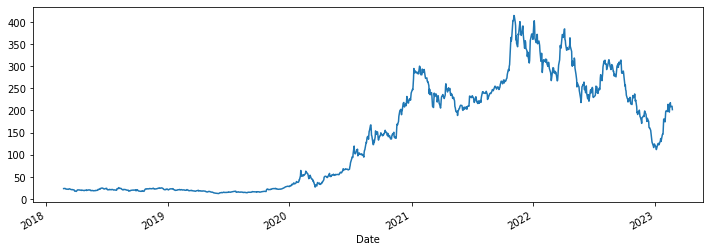

In [7]:
df_tsla['High'].plot(figsize = (12,4))

<AxesSubplot:xlabel='Date'>

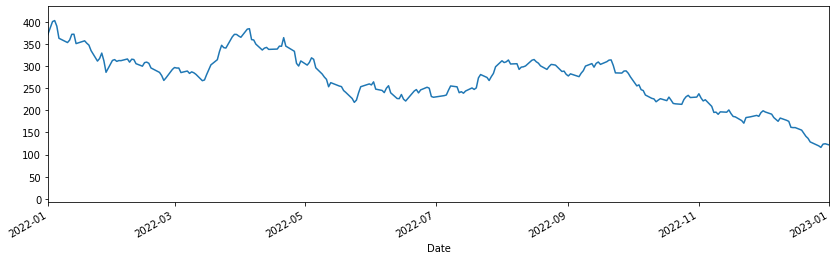

In [8]:
## x limit and y limit
df_tsla['High'].plot(xlim = ['2022-01-01', '2023-01-01'], figsize = (14,4))

<AxesSubplot:xlabel='Date'>

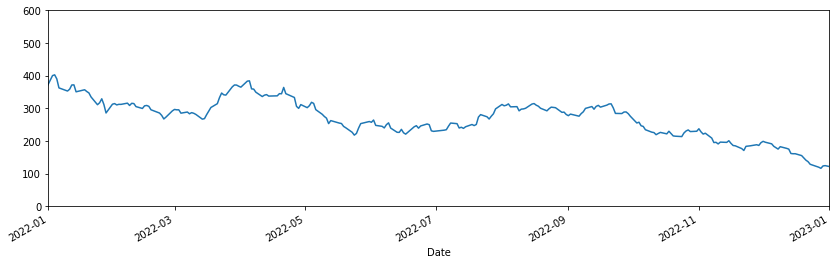

In [9]:
## x limit and y limit
df_tsla['High'].plot(xlim = ['2022-01-01', '2023-01-01'], ylim = [0,600], figsize = (14,4))

<AxesSubplot:xlabel='Date'>

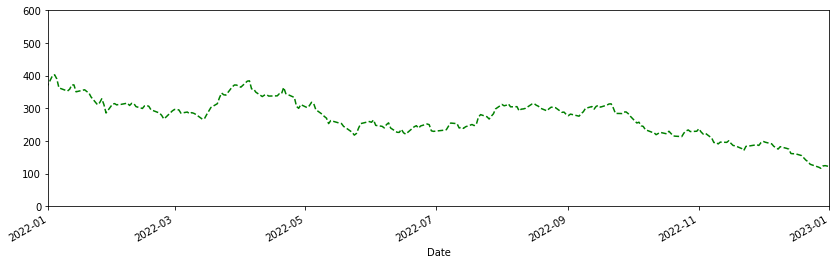

In [10]:
## x limit and y limit and coloring
df_tsla['High'].plot(xlim = ['2022-01-01', '2023-01-01'], ylim = [0,600], figsize = (14,4), ls = '--', c = 'green')

In [11]:
index = df_tsla.loc['2022-01-01':'2023-01-01'].index

share_open = df_tsla.loc['2022-01-01':'2023-01-01']['Open']

In [12]:
share_open

Date
2022-01-03    382.583344
2022-01-04    396.516663
2022-01-05    382.216675
2022-01-06    359.000000
2022-01-07    360.123322
                 ...    
2022-12-23    126.370003
2022-12-27    117.500000
2022-12-28    110.349998
2022-12-29    120.389999
2022-12-30    119.949997
Name: Open, Length: 251, dtype: float64

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

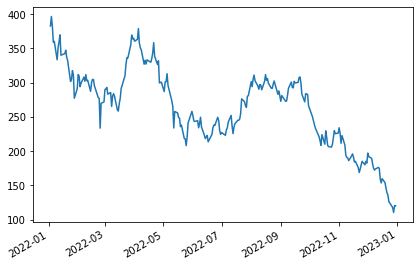

In [14]:
figure, axis = plt.subplots()
plt.tight_layout()

## preventing overlapping
figure.autofmt_xdate()
axis.plot(index, share_open)

In [15]:
## Datetime index

In [16]:
df_tsla = df_tsla.reset_index()

In [17]:
df_tsla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [18]:
#pd.to_datetime(df_tsla['Date'])
df_tsla = df_tsla.set_index('Date', drop = True)

In [19]:
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-23,23.188667,23.666000,23.139999,23.469999,23.469999,87261000
2018-02-26,23.566668,23.933332,23.490667,23.827999,23.827999,65100000
2018-02-27,23.750000,23.999332,23.334000,23.399332,23.399332,71961000
2018-02-28,23.504667,23.682667,22.814667,22.870667,22.870667,91045500
2018-03-01,23.000668,23.244667,22.004667,22.062000,22.062000,103284000


In [20]:
## datetime
from datetime import datetime

In [21]:
datetime(2021,11,21)

datetime.datetime(2021, 11, 21, 0, 0)

In [22]:
datetime.now()

datetime.datetime(2023, 2, 23, 14, 6, 20, 55293)

In [23]:
date = datetime(2021,11,21)

In [24]:
date

datetime.datetime(2021, 11, 21, 0, 0)

In [25]:
date.date()

datetime.date(2021, 11, 21)

In [26]:
date.day

21

In [27]:
date.weekday()

6

In [28]:
date.year

2021

In [29]:
date.month

11

### Time Resampling

In [30]:
df_tsla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-23,23.188667,23.666000,23.139999,23.469999,23.469999,87261000
2018-02-26,23.566668,23.933332,23.490667,23.827999,23.827999,65100000
2018-02-27,23.750000,23.999332,23.334000,23.399332,23.399332,71961000
2018-02-28,23.504667,23.682667,22.814667,22.870667,22.870667,91045500
2018-03-01,23.000668,23.244667,22.004667,22.062000,22.062000,103284000


In [31]:
df_tsla.resample(rule = 'A').min()  #rule A year end frequency

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,16.851999,17.355333,16.306000,16.704000,16.704000,46210500
2019-12-31,12.073333,12.445333,11.799333,11.931333,11.931333,36984000
2020-12-31,24.980000,26.990667,23.367332,24.081333,24.081333,52073100
2021-12-31,184.183334,188.736664,179.830002,187.666672,187.666672,29401800
2022-12-31,110.349998,116.269997,108.239998,109.099998,109.099998,41864700
2023-12-31,103.000000,111.750000,101.809998,108.099998,108.099998,138429900


In [32]:
df_tsla.resample(rule = 'A').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,25.000000,25.830667,24.474667,25.304667,25.304667,504745500
2019-12-31,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-12-31,233.330002,239.573334,230.373337,235.223328,235.223328,914082000
2021-12-31,411.470001,414.496674,405.666656,409.970001,409.970001,268189500
2022-12-31,396.516663,402.666656,378.679993,399.926666,399.926666,221923300
2023-12-31,211.759995,217.649994,206.110001,214.240005,214.240005,305632100


<AxesSubplot:xlabel='Date'>

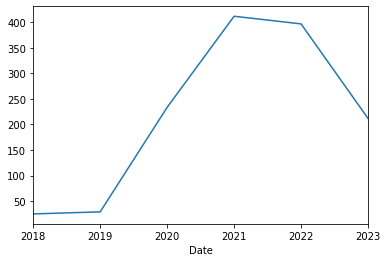

In [33]:
df_tsla.resample(rule = 'A').max()['Open'].plot()

In [34]:
#quarterly start frequency

df_tsla.resample(rule = 'QS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,23.750000,23.999332,23.490667,23.827999,23.827999,315021000
2018-04-01,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-01,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000
2019-04-01,19.219999,19.744667,19.144667,19.454000,19.454000,398206500
2019-07-01,17.278000,17.738001,17.210667,17.658667,17.658667,336274500
2019-10-01,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-01-01,61.566666,64.599335,60.068001,61.161331,61.161331,914082000


<AxesSubplot:xlabel='Date'>

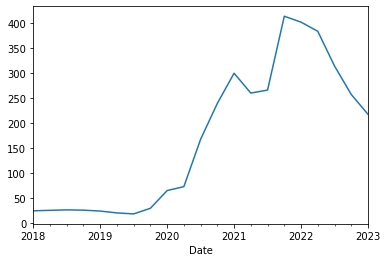

In [35]:
df_tsla.resample(rule = 'QS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

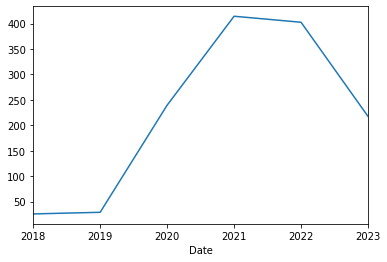

In [36]:
##Business End frequency
df_tsla.resample(rule = 'BA').max()['High'].plot()

In [37]:
##Business quarter frequency
df_tsla.resample(rule = 'BQS').max()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,23.750000,23.999332,23.490667,23.827999,23.827999,315021000
2018-04-02,24.344000,24.915333,23.633333,24.722000,24.722000,335211000
2018-07-02,24.606001,25.830667,24.474667,25.304667,25.304667,504745500
2018-10-01,25.000000,25.299334,24.450001,25.119333,25.119333,411382500
2019-01-01,23.080667,23.466667,22.943333,23.153999,23.153999,362262000
2019-04-01,19.219999,19.744667,19.144667,19.454000,19.454000,398206500
2019-07-01,17.278000,17.738001,17.210667,17.658667,17.658667,336274500
2019-10-01,29.000000,29.020666,28.423332,28.729334,28.729334,450091500
2020-01-01,61.566666,64.599335,60.068001,61.161331,61.161331,914082000


<AxesSubplot:xlabel='Date'>

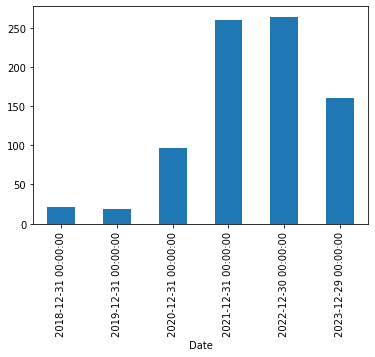

In [38]:
#plotting
df_tsla['Open'].resample(rule = 'BA').mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Date'>

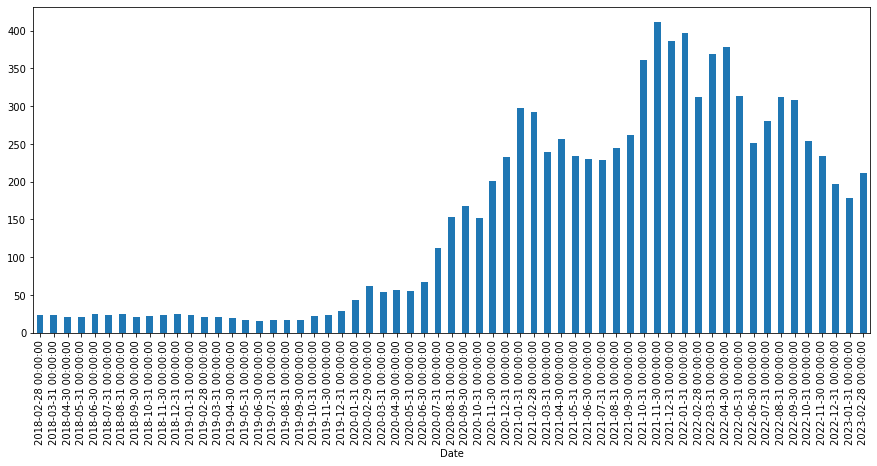

In [39]:
df_tsla['Open'].resample(rule = 'M').max().plot(kind = 'bar', figsize = (15,6))

#### Rolling

In [40]:
df_tsla['High'].rolling(11).mean().head(20)

Date
2018-02-23          NaN
2018-02-26          NaN
2018-02-27          NaN
2018-02-28          NaN
2018-03-01          NaN
2018-03-02          NaN
2018-03-05          NaN
2018-03-06          NaN
2018-03-07          NaN
2018-03-08          NaN
2018-03-09    22.918303
2018-03-12    22.871151
2018-03-13    22.799697
2018-03-14    22.677394
2018-03-15    22.541697
2018-03-16    22.412788
2018-03-19    22.325091
2018-03-20    22.194788
2018-03-21    22.110364
2018-03-22    22.027454
Name: High, dtype: float64

In [41]:
df_tsla['Open 30 days rolling'] = df_tsla['Open'].rolling(30).mean()

In [42]:
df_tsla.head(31)

,Open,High,Low,Close,Adj Close,Volume,Open 30 days rolling
Date,,,,,,,
2018-02-23,23.188667,23.666000,23.139999,23.469999,23.469999,87261000,NaN
2018-02-26,23.566668,23.933332,23.490667,23.827999,23.827999,65100000,NaN
2018-02-27,23.750000,23.999332,23.334000,23.399332,23.399332,71961000,NaN
2018-02-28,23.504667,23.682667,22.814667,22.870667,22.870667,91045500,NaN
2018-03-01,23.000668,23.244667,22.004667,22.062000,22.062000,103284000,NaN
2018-03-02,21.798668,22.348000,21.531334,22.341333,22.341333,76392000,NaN
2018-03-05,22.159332,22.516666,21.952667,22.223333,22.223333,57357000,NaN
2018-03-06,22.250000,22.424667,21.802000,21.879999,21.879999,64285500,NaN
2018-03-07,21.695999,22.166668,21.449333,22.153334,22.153334,75109500,NaN


<AxesSubplot:xlabel='Date'>

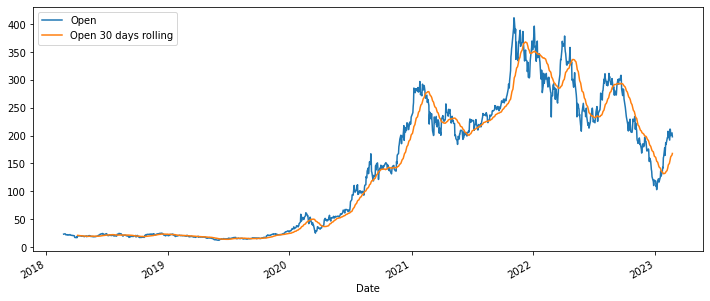

In [43]:
df_tsla[['Open','Open 30 days rolling']].plot(figsize = (12,5))